In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_palette('gist_earth')
import rfpimp  # pip install rfpimp
from sklearn.model_selection import train_test_split
from rfpimp import plot_corr_heatmap, plot_dependence_heatmap


data_dir = '../Desktop/kaggle_data/'
df_orig = pd.read_csv(f'{data_dir}breast-cancer-wisconsin-data.csv')

print(f'There are {len(df)} samples of {len(df.columns)} features.')
df.head()

There are 569 samples of 16 features.


,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.01587,0.03003,0.006193,0.4601,0.11890
1,842517,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01340,0.01389,0.003532,0.2750,0.08902
2,84300903,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.02058,0.02250,0.004571,0.3613,0.08758
3,84348301,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.01867,0.05963,0.009208,0.6638,0.17300
4,84358402,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.01885,0.01756,0.005115,0.2364,0.07678


In [10]:
# Identify Missing Values
miss_fraction = df.isnull().sum()/len(df)
unique_fraction = df.nunique()/len(df)
miss_unique = pd.concat([miss_fraction, unique_fraction], axis=1)
miss_unique = miss_unique.rename(columns = {0: 'missing_fraction', 1: 'unique_fraction'})
miss_unique = miss_unique.apply(lambda x: round(x, 3), axis=0)

miss_unique

,missing_fraction,unique_fraction
id,0.0,1.000
diagnosis,0.0,0.004
radius_mean,0.0,0.801
texture_mean,0.0,0.842
perimeter_mean,0.0,0.917
area_mean,0.0,0.947
smoothness_mean,0.0,0.833
compactness_mean,0.0,0.944
concavity_mean,0.0,0.944
concave points_mean,0.0,0.953


# Missing and Unique Values
This shows that we can drop the **Unamed: 32** column, introduced by an error probably. <br>
**id** is just an index, and **diagnosis** is the target.

# Feature selection
With so many geometric features, they are likely to be highly correlated and we will probably select a small feature subset.

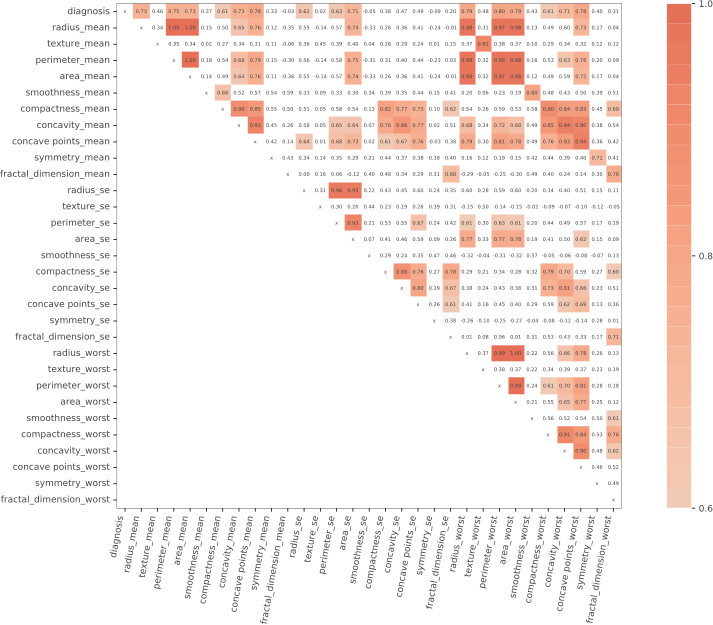

In [109]:
# Drop the all Null columns
df = pd.read_csv(f'{data_dir}breast-cancer-wisconsin-data.csv')
df = df.loc[:, ~df.isnull().all()]
# Encode the target
df.iloc[:, 1] = df.iloc[:, 1].replace({'M': 1, 'B': 0})


# Split the target and features
y = df.iloc[:, 1]
X = df.iloc[:, 2:]

# Training and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

plot_corr_heatmap(df.iloc[:, 1:], figsize=(16,9), label_fontsize=9, value_fontsize=5)


# From the feature correlations
We have a handful of fairly predictive features that correlate with our target at more than r = 0.7

We can remove the following features: <br>
-  'perimeter_mean', 'area_mean', 'area_worst', 'perimeter_worst', 'radius_worst', 'concave points_worst'
-   'texture_worst','area_se', 'perimeter_se', 'smoothness_worst', 'concavity_mean', 'concavity_se', 'concavity_worst',
-   'concave points_mean', 'compactness_worst', 'compactness_se'

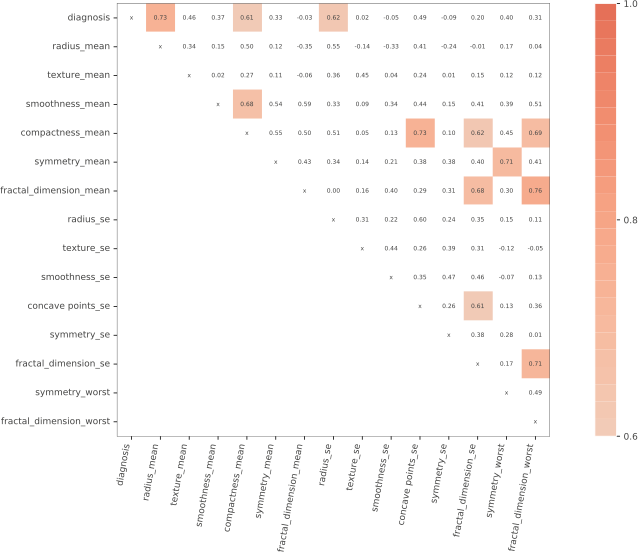

In [110]:
# Now drop the unnecessary features
cols_to_drop = [
    'perimeter_mean', 'area_mean', 'area_worst', 'perimeter_worst', 'radius_worst', 'concave points_worst',
    'texture_worst','area_se', 'perimeter_se', 'smoothness_worst', 'concavity_mean', 'concavity_se', 'concavity_worst',
    'concave points_mean', 'compactness_worst', 'compactness_se'
]
df.drop(cols_to_drop, axis=1, inplace=True)

# Split the target and features
y = df.iloc[:, 1]
X = df.iloc[:, 2:]

# Training and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

plot_corr_heatmap(df.iloc[:, 1:], figsize=(16,8), label_fontsize=9, value_fontsize=6)


# Class Imbalance
There's not a large class imbalance, but it still may help to add weights to balance them in the models.

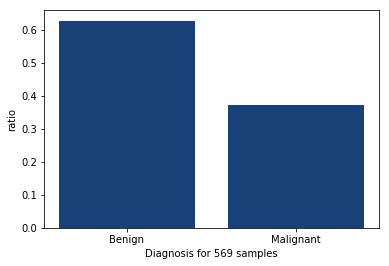

In [115]:
plt.bar([0, 1], np.bincount(y)/len(y))
plt.xlabel(f'Diagnosis for {len(y)} samples')
plt.ylabel('ratio')
plt.xticks([0,1], ['Benign', 'Malignant'])
plt.show()


# Standardization:
Even though you don't have to scale features for some models, it's good practice to standardize.

In [59]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)


In [105]:
# Lets try some models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression(solver='lbfgs')
lr_balanced_model = LogisticRegression(class_weight='balanced', solver='lbfgs')
rf_model = RandomForestClassifier(n_estimators=50)
rf_balanced_model = RandomForestClassifier(n_estimators=50, class_weight='balanced')
et_model = ExtraTreesClassifier(n_estimators=50)
et_balanced_model = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

models = {
    'lr_model': lr_model, 'lr_balanced_model': lr_balanced_model, 'rf_model': rf_model, 
    'rf_balanced_model': rf_balanced_model, 'et_model': et_model, 'et_balanced_model': et_balanced_model,
}
scores = {model: None for model in models}

for model in models.keys():
    # Do a 2 fold cross validation to estimate accuracy
    acc_scores = cross_val_score(models[model], X_train_std, y=y_train, scoring='f1', cv=2, n_jobs=-1)
    cv_acc = sum(acc_score)/len(acc_score)

    # Predict the test set and check the estimated generalization accuracy
    models[model].fit(X_train_std, y_train)
    prediction = models[model].predict(X_test_std)
    test_acc = accuracy_score(y_test, prediction)
    test_f1 = f1_score(y_test, prediction)
    
    # Keep track of scores
    scores[model] = {'validation_f1': cv_acc, 'test_accuracy': test_acc, 'test_f1': test_f1}
    
    
scores = pd.DataFrame(scores).transpose().sort_values('test_f1', ascending=False)

scores
    
    

,test_accuracy,test_f1,validation_f1
rf_balanced_model,0.973684,0.965517,0.944928
lr_model,0.964912,0.953488,0.944928
lr_balanced_model,0.956140,0.942529,0.944928
et_model,0.947368,0.928571,0.944928
et_balanced_model,0.947368,0.928571,0.944928
rf_model,0.938596,0.917647,0.944928


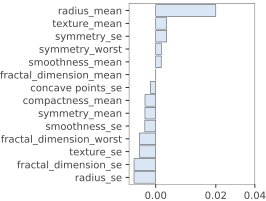

In [123]:
from rfpimp import cv_importances, plot_importances
imps = cv_importances(rf_balanced_model, X_train, y_train, k=2)
plot_importances(imps, yrot=0, label_fontsize=10, width=4, minheight=1.5, vscale=1, imp_range=(-0.01, 0.04))

# Summary:
All simple models work well, as we have very predictive features that are not too correlated. <br>
More detailed feature selection should be done with principal component analysis. <br>
We don't need all the features, and some of the less informative ones can hurt the accuracy of the model.

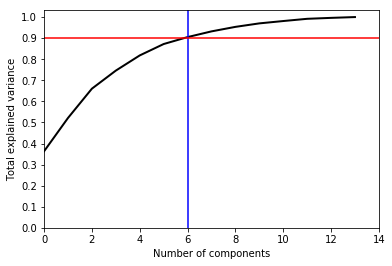

In [132]:
pca = PCA()
pca.fit(X_train_std)

# Plot the explained variances
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, len(X_train.columns))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.9, c='r')
plt.show()



In [139]:
# We know that the first 6 principal components explain 90% of the variance, so let's use top 8

# Create a PCA model with 8 components: pca
pca = PCA(n_components=8)

# Fit the PCA instance to the scaled samples
pca.fit(X_train_std)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X_train_std)
pca_test_features = pca.transform(X_test_std)


lr_balanced_model_pc = LogisticRegression(class_weight='balanced', solver='lbfgs')
lr_balanced_model_pc.fit(X_train_std, y_train)
predicted = lr_balanced_model_pc.predict(X_test_std)

print("Using all selected features, the LogisticRegression model gets:")
print(f"accuracy = {accuracy_score(y_test, predicted)}")
print(f"f1 = {f1_score(y_test, predicted)}")


lr_balanced_model_pc = LogisticRegression(class_weight='balanced', solver='lbfgs')
lr_balanced_model_pc.fit(pca_features, y_train)
predicted = lr_balanced_model_pc.predict(pca_test_features)

print("")
print("Using top 8 PC features, the LogisticRegression model gets:")
print(f"accuracy = {accuracy_score(y_test, predicted)}")
print(f"f1 = {f1_score(y_test, predicted)}")

Using all selected features, the LogisticRegression model gets:
accuracy = 0.956140350877193
f1 = 0.942528735632184

Using top 8 PC features, the LogisticRegression model gets:
accuracy = 0.956140350877193
f1 = 0.942528735632184


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


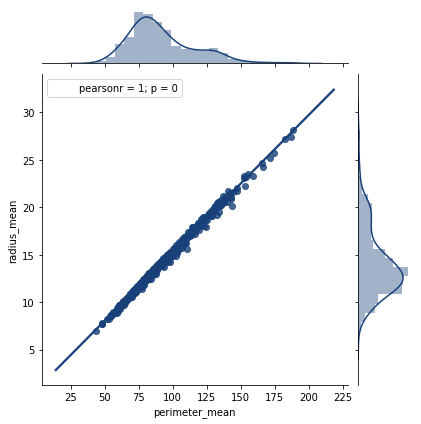

In [147]:
from scipy import stats

sns.jointplot(x='perimeter_mean', y='radius_mean', kind="reg", data=df_orig, stat_func=stats.pearsonr)

In [150]:
data = pd.melt(df_orig.iloc[:, 1:5], id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
data

,diagnosis,features,value
0,M,radius_mean,17.990
1,M,radius_mean,20.570
2,M,radius_mean,19.690
3,M,radius_mean,11.420
4,M,radius_mean,20.290
5,M,radius_mean,12.450
6,M,radius_mean,18.250
7,M,radius_mean,13.710
8,M,radius_mean,13.000
9,M,radius_mean,12.460


In [151]:
!pwd

/Users/kasey/python_practice
